In [1]:
#Here we will be working with the Perceptron model using the scikit-learn library 
#to classify classes i.e. "versicolor" and "virginica"  the Iris dataset
#which are based on two major features i.e. sepal length and petal length. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import a function for plotting decision boudaries
# !pip install mlxtend
from mlxtend.plotting import plot_decision_regions
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html
from sklearn.linear_model import Perceptron

In [3]:
# Read the iris dataset into a pandas DataFrame object
df = pd.read_csv("./iris_dataset.csv")

In [4]:
# We need only versicolor and virginica which are the first 100 rows

df = df.iloc[50:150]
df

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
X = df[["sepal_length", "petal_length"]]

In [6]:
# Store the labels in y
y = df['species']

# We can leave the original labels and use sklearn perceptron,
# but to use mlxtend for plotting we need to encode the labels
# versicolor = -1, virginica = 1

y = np.where(y == 'versicolor', -1, 1)

y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [7]:
# Instantiate one instance of the Perceptron class
clf = Perceptron()

# Fit the model to the training data
clf.fit(X, y)

Perceptron()

In [8]:
# Compute predict labels on X
y_pred = clf.predict(X)
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,
        1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,
       -1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1])

In [9]:
# Actual labels
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [10]:
# Compare actual and predicted labels
print(y == y_pred)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False False False  True  True False  True  True  True False False  True
  True False  True  True False False  True False  True False  True False
  True False  True  True False False  True False  True  True  True False
 False False  True  True]


In [11]:
clf.coef_   # weights

array([[-56.5,  74.9]])

In [12]:
clf.intercept_  # bias 

array([-38.])

In [13]:
X.to_numpy()

array([[7. , 4.7],
       [6.4, 4.5],
       [6.9, 4.9],
       [5.5, 4. ],
       [6.5, 4.6],
       [5.7, 4.5],
       [6.3, 4.7],
       [4.9, 3.3],
       [6.6, 4.6],
       [5.2, 3.9],
       [5. , 3.5],
       [5.9, 4.2],
       [6. , 4. ],
       [6.1, 4.7],
       [5.6, 3.6],
       [6.7, 4.4],
       [5.6, 4.5],
       [5.8, 4.1],
       [6.2, 4.5],
       [5.6, 3.9],
       [5.9, 4.8],
       [6.1, 4. ],
       [6.3, 4.9],
       [6.1, 4.7],
       [6.4, 4.3],
       [6.6, 4.4],
       [6.8, 4.8],
       [6.7, 5. ],
       [6. , 4.5],
       [5.7, 3.5],
       [5.5, 3.8],
       [5.5, 3.7],
       [5.8, 3.9],
       [6. , 5.1],
       [5.4, 4.5],
       [6. , 4.5],
       [6.7, 4.7],
       [6.3, 4.4],
       [5.6, 4.1],
       [5.5, 4. ],
       [5.5, 4.4],
       [6.1, 4.6],
       [5.8, 4. ],
       [5. , 3.3],
       [5.6, 4.2],
       [5.7, 4.2],
       [5.7, 4.2],
       [6.2, 4.3],
       [5.1, 3. ],
       [5.7, 4.1],
       [6.3, 6. ],
       [5.8, 5.1],
       [7.1,

/Users/rohitkumbar/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


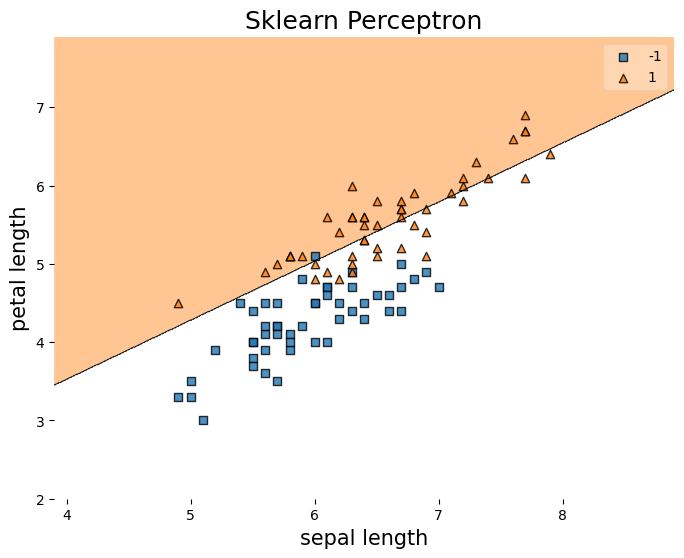

In [14]:
plt.figure(figsize = (8, 6))
plot_decision_regions(X.to_numpy(), y, clf = clf)
plt.title("Sklearn Perceptron", fontsize = 18)
plt.xlabel("sepal length", fontsize = 15)
plt.ylabel("petal length", fontsize = 15);

In [15]:
# We can use this classifier to predict the species of a flower with measurements 6 (sepal length) and 6 (petal length.)
# Obviously from the graph, the label should be 1. 

clf.predict([[6, 6]])

/Users/rohitkumbar/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


array([1])

In [16]:
# calculate accuracy of this model for this particular data set
clf.score(X,y)

0.8

In [17]:
# The below code is for plotting the error graph for this data set

In [18]:
X = df[["sepal_length", "petal_length"]].to_numpy()

In [19]:
class MyPerceptron(object):
    def __init__(self, eta = 0.5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def fit(self, X, y):
        self.w1 = np.random.rand(1)
        self.w2 = np.random.rand(1)
        self.b = np.random.rand(1)
        
        self.errors = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, yi in zip(X, y):
                update = self.eta * (self.predict(xi) - yi)
                self.w1 = self.w1 - update*xi[0]
                self.w2 = self.w2 - update*xi[1]
                self.b = self.b - update
                errors = errors + int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors.append(errors)
            
        return self
    
    def weighted_sum(self, x):
        self.w = np.array([self.w1, self.w2])
        return np.dot(x, self.w) + self.b
    
    def predict(self, x):
        return np.where(self.weighted_sum(x) > 0.0, 1, -1)

In [20]:
# Instantiate one instance of My_Perceptron class
my_clf = MyPerceptron()

# Call the fit method 
my_clf.fit(X, y)

In [21]:
# Predict labels on X
y_pred = my_clf.predict(X)

In [22]:
y_pred = y_pred.reshape(100)

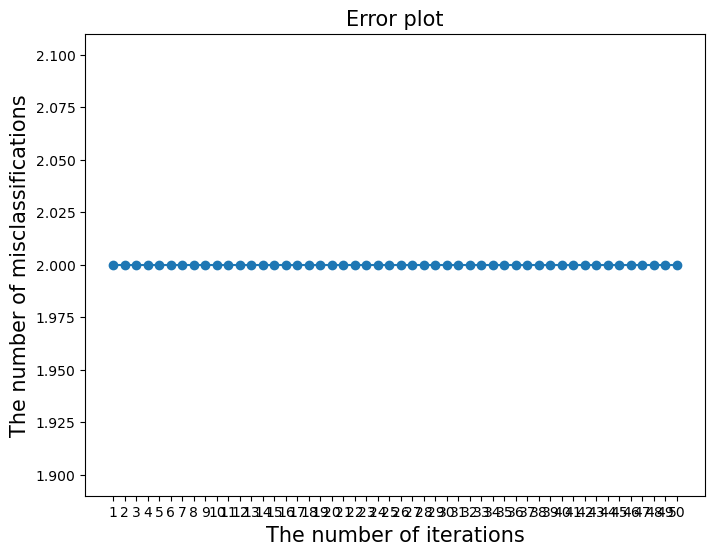

In [23]:
# We plot the errors for each iteration
# We also see the number of iterations needed for the algorithm to find the classifier

plt.figure(figsize = (8, 6))
plt.plot(range(1, len(my_clf.errors)+1), my_clf.errors, 
         marker = "o")
plt.title("Error plot", fontsize = 15)
plt.xlabel("The number of iterations", fontsize = 15)
plt.ylabel("The number of misclassifications", fontsize = 15)
plt.xticks(range(1, len(my_clf.errors)+1))
plt.show()

In [24]:
my_clf.w #weights

array([[-35.41371701],
       [ 50.31268686]])

In [25]:
my_clf.b #bias

array([0.90451219])